# Building Inspection Toolkit

#### v0.1.6


In [ ]:
!pip install git+https://github.com/phiyodr/building-inspection-toolkit
!pip install patool
!pip install efficientnet-pytorch
!pip install torchmetrics

## Data

#### List and download data

In [37]:
from bikit.utils import list_datasets, download_dataset

# List all datasets
all_dataset = list_datasets(verbose=0)
all_dataset.keys()

dict_keys(['codebrim-classif-balanced', 'codebrim-classif', 'mcds_Bukhsh', 'mcds_bikit', 'bcd', 'sdnet', 'sdnet_binary', 'sdnet_bikit', 'sdnet_bikit_binary', 'cds', 'meta2', 'meta3', 'meta4', 'dacl1k', 'meta2+dacl1k', 'meta3+dacl1k', 'meta4+dacl1k'])

In [38]:
# Download data
DATASET_NAME = "mcds_bikit"
download_dataset(DATASET_NAME) 

/root/.cache/bikit already exists
/root/.cache/bikit and /root/.cache/bikit/mcds already exists.


#### Use BikitDataset

In [39]:
from bikit.utils import download_dataset
from bikit.datasets import BikitDataset 
from torch.utils.data import DataLoader
from torchvision import transforms

# Define transform
my_transform = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])

# Use return_type 'pt' (default) or 'np'
train_dataset = BikitDataset(DATASET_NAME, split="train", transform=my_transform, return_type="pt") 
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=False, num_workers=0)

# Use it in your training loop
for i, (imgs, labels) in enumerate(train_loader):
	print(i, imgs.shape, labels.shape)
	break

0 torch.Size([64, 3, 256, 256]) torch.Size([64, 8])


## Metrics

In [40]:
from bikit.metrics import EMR_mt, Recalls_mt
import torch

myemr = EMR_mt(use_logits=False)
myrecalls = Recalls_mt()

# fake data
preds0  = torch.tensor([[.9, 0.1, 0.9, 0.1, 0.9, 0.1], 
                       [.8, 0.2, 0.9, 0.2, 0.9, 0.2], 
                       [.7, 0.9, 0.2 , 0.2, 0.2 , 0.2]])
preds1 = torch.tensor([[.0, 0.1, 0.9, 0.1, 0.9, 0.1], 
                       [.8, 0.2, 0.9, 0.2, 0.9, 0.2], 
                       [.7, 0.9, 0.2 , 0.9, 0.2 , 0.9]])
target = torch.tensor([[1, 0, 1, 0, 0, 1], 
                      [1, 1, 0, 0, 1, 0], 
                      [1, 1, 0, 1, 0, 1]])

# batch 0
myemr(preds0, target), myrecalls(preds0, target)
print(myemr.compute(), myrecalls.compute())

# batch 1
myemr(preds1, target), myrecalls(preds1, target)    
print(myemr.compute(), myrecalls.compute())

# Reset at end of epoch
myemr.reset(), myrecalls.reset()
print(myemr, myrecalls)

tensor(0.) tensor([1.0000, 0.5000, 1.0000, 0.0000, 1.0000, 0.0000])
tensor(0.1667) tensor([0.8333, 0.5000, 1.0000, 0.5000, 1.0000, 0.2500])
EMR_mt() Recalls_mt()


/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (EMR_mt). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


# Models

#### List models

In [41]:
from bikit.utils import list_models

# List all models
all_models = list_models(verbose=0)
print(all_models.keys())


dict_keys(['CODEBRIMbalanced_EfficientNetV1B0_dhb', 'CODEBRIMbalanced_MobileNetV2', 'CODEBRIMbalanced_MobileNetV3Large_hta', 'CODEBRIMbalanced_ResNet50_hta', 'MCDSbikit_EfficientNetV1B0_dhb', 'MCDSbikit_ResNet50_dhb', 'MCDSbikit_MobileNetV3Large_hta', 'META4_MobileNetV3Large_dhb', 'META4_MobileNetV3Large_ho', 'META4_MobileNetV3Large_hta', 'META4_ResNet50_dhb', 'META4_ResNet50_ho', 'META4_ResNet50_hta', 'META3_MobileNetV3Large_dhb', 'META3_MobileNetV3Large_ho', 'META3_MobileNetV3Large_hta', 'META3_ResNet50_dhb', 'META3_ResNet50_ho', 'META3_ResNet50_hta', 'META2_MobileNetV3Large_dhb', 'META2_MobileNetV3Large_ho', 'META2_MobileNetV3Large_hta', 'META2_ResNet50_dhb', 'META2_ResNet50_ho', 'META2_ResNet50_hta', 'DACL1K_MobileNetV3Large_hta', 'DACL1K_MobileNetV3Large_INpretr', 'DACL1K_MobileNetV3Large_scratch', 'META4+DACL1K_MobileNetV3Large_hta', 'META4+DACL1K_MobileNetV3Large_INpretr', 'META4+DACL1K_MobileNetV3Lare_scratch'])


#### Model Inference

Crack                [██████████████████████████████████████  ]  95.79% 
Efflorescence        [                                        ]   0.56% 
ExposedReinforcement [                                        ]   0.18% 
General              [                                        ]   0.61% 
NoDefect             [                                        ]   1.31% 
RustStaining         [                                        ]   0.44% 
Scaling              [                                        ]   0.05% 
Spalling             [                                        ]   0.86% 
Inference time (CPU): 207.96 ms


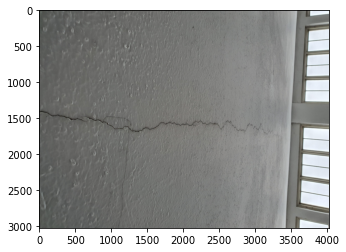

In [42]:
from bikit.utils import load_model, get_metadata, load_img_from_url
from bikit.models import make_prediction
from matplotlib import pyplot as plt 

# Download and load model
model, metadata = load_model("MCDSbikit_ResNet50_dhb", add_metadata=True)

img = load_img_from_url("https://github.com/phiyodr/building-inspection-toolkit/raw/master/bikit/data/11_001990.jpg")
plt.imshow(np.asarray(img))
prob, pred = make_prediction(model, img, metadata, print_predictions=True, preprocess_image=True)